# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [21]:
# For the selected coordinates, use citipy to associate them with nearest city.

LatLon["Closest City name"] = ""
LatLon["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())

/Users/jahirmunguia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/jahirmunguia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [27]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [28]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []

#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
Start of Records
------------------------------
City number 1 of 606 complete. | Added flinders
City number 2 of 606 complete. | Added ushuaia
City number 3 of 606 complete. | Added umarkot
City number 4 of 606 complete. | Added punta arenas
City number 5 of 606 complete. | Added santa rosa
City number 6 of 606 complete. | Added kushiro
City number 7 of 606 complete. | Added carnarvon
City number 8 of 606 complete. | Added waingapu
City number 9 of 606 complete. | Added hithadhoo
City number 10 of 606 complete. | Added jamestown
City number 11 of 606 complete. | Added hobart
City number 12 of 606 complete. | Added marsh harbour
City number 13 of 606 complete. | Added porto velho
City number 14 of 606 complete. | Added korsakov
City number 15 of 606 complete. | Added butaritari
City number 16 of 606 complete. | Added mataura
City number 17 of 606 complete. | Added dombovar
City number 18 of 606 complete. | Added cape town
Missing data in city number 19 of 

City number 161 of 606 complete. | Added kingsville
City number 162 of 606 complete. | Added korba
City number 163 of 606 complete. | Added lompoc
City number 164 of 606 complete. | Added slave lake
City number 165 of 606 complete. | Added camacha
Missing data in city number 166 of 606. | Skipping rungata
City number 167 of 606 complete. | Added zenzeli
City number 168 of 606 complete. | Added saint anthony
City number 169 of 606 complete. | Added yar-sale
City number 170 of 606 complete. | Added beidao
City number 171 of 606 complete. | Added srednekolymsk
City number 172 of 606 complete. | Added geraldton
City number 173 of 606 complete. | Added san quintin
City number 174 of 606 complete. | Added springbok
Missing data in city number 175 of 606. | Skipping illoqqortoormiut
City number 176 of 606 complete. | Added tsiroanomandidy
City number 177 of 606 complete. | Added gizo
City number 178 of 606 complete. | Added vestmannaeyjar
City number 179 of 606 complete. | Added bacalar
City 

City number 320 of 606 complete. | Added seymchan
Missing data in city number 321 of 606. | Skipping tabulbah
City number 322 of 606 complete. | Added pevek
City number 323 of 606 complete. | Added montijo
City number 324 of 606 complete. | Added rocha
Missing data in city number 325 of 606. | Skipping bolungarvik
City number 326 of 606 complete. | Added sao felix do xingu
City number 327 of 606 complete. | Added cherskiy
City number 328 of 606 complete. | Added sal rei
City number 329 of 606 complete. | Added codrington
City number 330 of 606 complete. | Added mersing
City number 331 of 606 complete. | Added kalispell
City number 332 of 606 complete. | Added xai-xai
Missing data in city number 333 of 606. | Skipping sorvag
City number 334 of 606 complete. | Added ancud
City number 335 of 606 complete. | Added colares
City number 336 of 606 complete. | Added necochea
City number 337 of 606 complete. | Added pemba
City number 338 of 606 complete. | Added egvekinot
City number 339 of 606

City number 479 of 606 complete. | Added kanigoro
City number 480 of 606 complete. | Added sherbakul
City number 481 of 606 complete. | Added aykhal
City number 482 of 606 complete. | Added tabou
Missing data in city number 483 of 606. | Skipping palaiokhora
City number 484 of 606 complete. | Added sinnamary
City number 485 of 606 complete. | Added arlit
Missing data in city number 486 of 606. | Skipping one hundred mile house
City number 487 of 606 complete. | Added qaqortoq
City number 488 of 606 complete. | Added muheza
City number 489 of 606 complete. | Added port-cartier
City number 490 of 606 complete. | Added aklavik
City number 491 of 606 complete. | Added kamariotissa
City number 492 of 606 complete. | Added constitucion
City number 493 of 606 complete. | Added bhadrachalam
City number 494 of 606 complete. | Added haines junction
City number 495 of 606 complete. | Added provideniya
City number 496 of 606 complete. | Added solginskiy
City number 497 of 606 complete. | Added niz

In [30]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Flinders,-34.58,150.85,71.60,100,90,10.29
1,Ushuaia,-54.81,-68.31,57.20,47,40,18.34
2,Umarkot,25.37,69.74,69.63,87,56,4.97
3,Punta Arenas,-53.16,-70.91,50.00,87,90,17.22
4,Santa Rosa,-36.62,-64.29,52.62,73,0,9.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

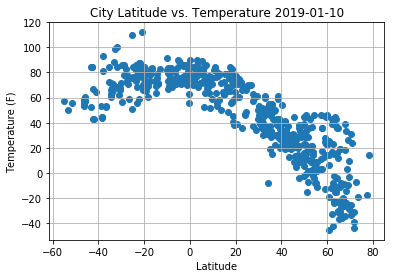

In [31]:
#Plot latitude vs temperature and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

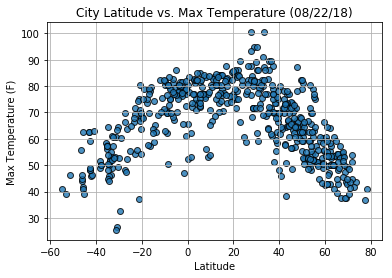

In [6]:
# I leave the graphic just for reference.


#### Latitude vs. Humidity Plot

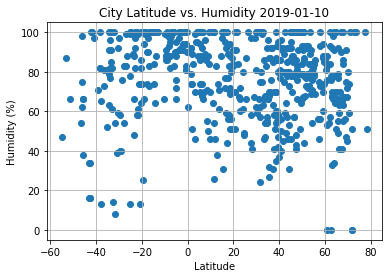

In [32]:
#Plot latitude vs humidity and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

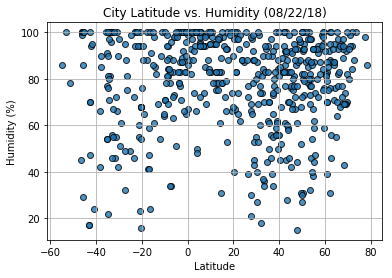

In [7]:
# I leave the graphic just for reference.


#### Latitude vs. Cloudiness Plot

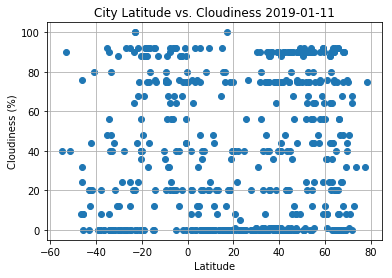

In [36]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

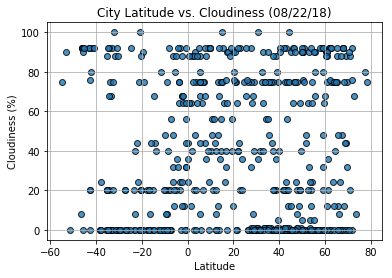

In [8]:
# I leave the graphic just for reference.


#### Latitude vs. Wind Speed Plot

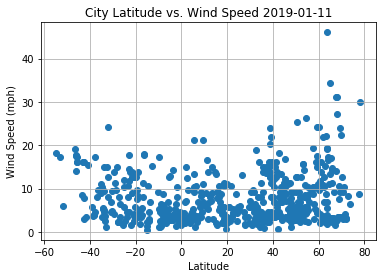

In [37]:
#Plot latitude vs wind speed and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

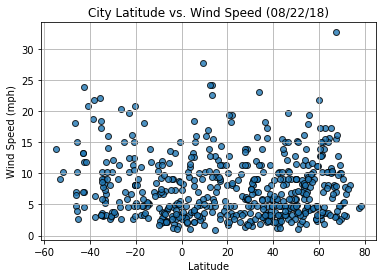

In [9]:
# I leave the graphic just for reference.
